In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from scipy import signal

from glob import glob
import pickle

#from main_dnn import train, inference
from evaluate import calculate_pesq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
#workspace = '/import/vision-eddydata/dm005_tmp'
workspace = '/import/vision-eddydata/dm005_tmp/workspace_8kHz'

In [3]:
#train(workspace, [-5, 0, 5, 10, 15], 0, 1e-2, 'MD1', force=True)

In [4]:
#train(workspace, [-25, -20, -15, -10, -5], 0, 1e-3, 'baseline', force=True)

In [5]:
#train(workspace, [-25, -20, -15, -10, -5, 0, 5, 10, 15], 0, 1e-4, 'MD3')

In [6]:
# inference(workspace, tr_snr=[-5, 15],
#           te_snr=[-30, -25, -20, -15, -10, -5, 0], n_concat=7, iteration=100000,
#           model_name='MD1', force=True)
# inference(workspace, tr_snr=[-25, -20, -15, -10, -5, 0, 5, 10, 15],
#           te_snr=[-30, -25, -20, -15, -10, -5, 0], n_concat=7, iteration=100000,
#           model_name='MD3')

In [7]:
#inference(workspace, tr_snr=[-25, -5],
#          te_snr=[-30, -25, -20, -15, -10, -5, 0], n_concat=7, iteration=100000,
#          model_name='MD2', force=True)

In [8]:
#speech_dir = '../../../datasets/TIMIT/data/TEST'
#te_snr = [-30, -25, -20, -15, -10, -5, 0]

In [15]:
speech_dir = '/import/vision-eddydata/dm005_tmp/TIMIT_8kHZ/data/TEST'
te_snr = [-30, -25, -20, -15, -10, -5, 0]

In [16]:
def eval_all_and_plot(model_names, speech_dir, te_snr, plot_name=None, figsize=(6,4), ax=None, legend=True,
                      library='pypesq', **kwargs):
    dfs = {}
    labels = {}
    if ax is None:
        fig = plt.figure(figsize=figsize)
    else:
        plt.sca(ax)
        
    for model_name, label in model_names:
        labels[model_name] = label
        dfs[model_name] = calculate_pesq(workspace, speech_dir=speech_dir, te_snr=te_snr,
                                         model_name=model_name, calc_mixed=(model_name=='input'),
                                         library=library, **kwargs)
    
    pesqs = {}
    for model_name, df in dfs.items():
        pesqs[model_name] = df.groupby('snr').agg({'pesq': ['mean']})['pesq']['mean']
        
    for model_name, series in pesqs.items():
        line_kwargs = {'marker': 'o', 'alpha': 0.8}
        if model_name == 'input':
            line_kwargs = {'c': 'black', 'ls': '--'}
        plt.plot(series.index, series, label=labels[model_name], **line_kwargs)
    
    plt.grid(which='both')
    #plt.ylabel('PESQ' if library.endswith('pesq') else library.upper())
    plt.title('PESQ' if library.endswith('pesq') else library.upper())
    plt.xlabel('SNR, dB')
    #plt.title('Test noises n121-122')
    if legend:
        plt.legend()
    if plot_name is not None:
        plt.savefig(plot_name, bbox_inches='tight')
    
    if ax is None:
        plt.show()

In [11]:
# model_names = [
#     ('input', 'Original noisy input'),
#     ('MD3', 'Baseline DNN'),
#     #('denoiser', 'Denoiser'),
#     ('dcunet-16-v2', 'DCUNet-20'),
#     #('dccrn-v2', 'DCCRN'),
#     #('unetgan-v1', 'UNetGAN'),
#     #('dcunet-20-drones-25dB-only', 'DCUNet-20 (drones, -25dB)')
#     #('dcunet-20-drones-v3', 'DCUNet-20 (drones)'), #remove for fair comparison
# ]

In [17]:
model_names = [
    ('input', 'Original noisy input'),
    #('dcunet-20-v1','DCUNet-20 (fixed training set)'),
    #('dcunet-20-rand-v1', 'DCUNet-20 (random training set)'),
    ('dcunet-20-rand-v2', 'DCUNet-20'),
    ('dccrn-rand-v1', 'DCCRN')
]

Score is already calculated
Score is already calculated
Score is already calculated
Score is already calculated
Score is already calculated
Score is already calculated
Score is already calculated
Score is already calculated
Score is already calculated


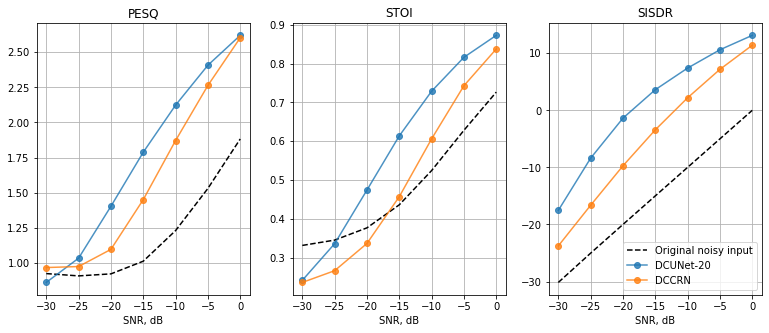

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))
eval_all_and_plot(model_names, speech_dir, te_snr, library='pypesq', ax=axes[0], legend=False)
eval_all_and_plot(model_names, speech_dir, te_snr, library='stoi', ax=axes[1], legend=False)
eval_all_and_plot(model_names, speech_dir, te_snr, library='sisdr', ax=axes[2], legend=True)
plt.savefig('n121-n122-dcunet-8kHz.pdf', bbox_inches='tight')
plt.show()

PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated


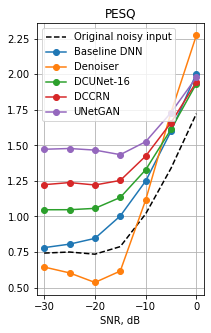

In [54]:
eval_all_and_plot(model_names, speech_dir, te_snr, plot_name='n121-n122-pesq1-v2.pdf', figsize=(3,5))

In [49]:
#eval_all_and_plot(model_names, speech_dir, te_snr, plot_name='n121-n122-pesq2-nb-smol.pdf', figsize=(3,5),
#                  library='pesq', mode='nb')

In [50]:
#eval_all_and_plot(model_names, speech_dir, te_snr, plot_name='n121-n122-pesq2-wb-smol.pdf', figsize=(3,5),
#                  library='pesq', mode='wb')

PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated


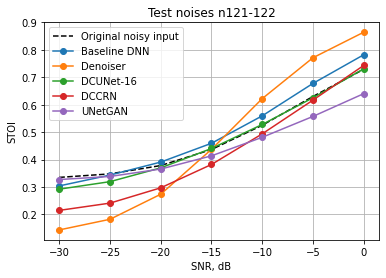

In [51]:
eval_all_and_plot(model_names, speech_dir, te_snr, plot_name='n121-n122-stoi.pdf', library='stoi')

PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated
PESQ is already calculated


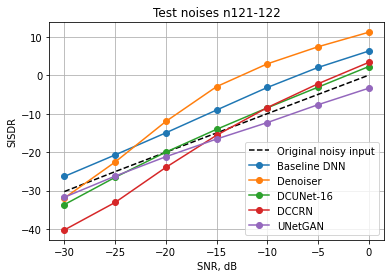

In [52]:
eval_all_and_plot(model_names, speech_dir, te_snr, plot_name='n121-n122-sisdr.pdf', library='sisdr')

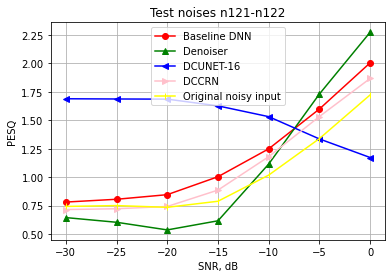

In [22]:
#plt.plot(md1_pesqs.index, md1_pesqs, label='MD1', c='green', marker='o')
#plt.plot(md2_pesqs.index, md2_pesqs, label='MD2', c='red', marker='o')
plt.plot(md3_pesqs.index, md3_pesqs, label='Baseline DNN', c='red', marker='o')
plt.plot(denoiser_pesqs.index, denoiser_pesqs, label='Denoiser', c='green', marker='^')
plt.plot(dcunet16_pesqs.index, dcunet16_pesqs, label='DCUNET-16', c='blue', marker='<')
plt.plot(dccrn_pesqs.index, dccrn_pesqs, label='DCCRN', c='pink', marker='>')
plt.plot(input_pesqs.index, input_pesqs, label='Original noisy input', c='yellow', marker='|')
plt.grid(which='both')
plt.ylabel('PESQ')
plt.xlabel('SNR, dB')
plt.title('Test noises n121-n122')
plt.legend()
plt.savefig('n121-n122-16kHz.pdf', bbox_inches='tight')
plt.show()

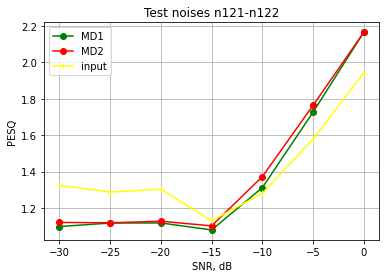

In [20]:
plt.plot(md1_pesqs.index, md1_pesqs, label='MD1', c='green', marker='o')
plt.plot(md2_pesqs.index, md2_pesqs, label='MD2', c='red', marker='o')
plt.plot(input_pesqs.index, input_pesqs, label='input', c='yellow', marker='|')
plt.grid(which='both')
plt.ylabel('PESQ')
plt.xlabel('SNR, dB')
plt.title('Test noises n121-n122')
plt.legend()
plt.savefig('n121-n122.pdf', bbox_inches='tight')
plt.show()

In [9]:
input_pesqs_old = pd.read_csv('./workspace_full/evaluation/pesq_results_input.csv')
input_pesqs_old = input_pesqs_old.groupby('snr').agg({'pesq': ['mean']})['pesq']['mean']
input_pesqs_old

snr
-30    1.296284
-25    1.317320
-20    1.327170
-15    1.375069
-10    1.449824
-5     1.484338
 0     1.540644
Name: mean, dtype: float64

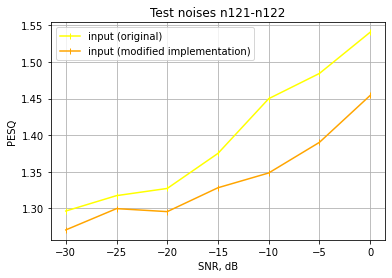

In [12]:
plt.plot(input_pesqs_old.index, input_pesqs_old, label='input (original)', c='yellow', marker='|')
plt.plot(input_pesqs.index, input_pesqs, label='input (modified implementation)', c='orange', marker='|')
plt.grid(which='both')
plt.ylabel('PESQ')
plt.xlabel('SNR, dB')
plt.title('Test noises n121-n122')
plt.legend()
plt.savefig('n121-n122-inputs.pdf', bbox_inches='tight')
plt.show()